In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cobaya.run import run
from collections import OrderedDict as odict

In [4]:
##Run COBAYA:
info = {"output": "chains/gaussian",
    "likelihood": {
        "gaussian": {
            "mean": [0.2, 0],
            "cov": [[0.1, 0.05],
                    [0.05,0.2]]}},
    "params": odict([
        ("a", {
            "prior": {"min": -0.5, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"dist": "norm", "loc": 0, "scale": 1},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": None}}

updated_info, products = run(info)

[output] Products to be written into folder 'chains', with prefix 'gaussian'
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Initial covariance matrix.
[mcmc] Initial point:
[prior] Reference values or pdf's for some parameters were not provided. Sampling from the prior instead for those parameters.
[mcmc] 
weight  minuslogpost         a    b  derived_a  derived_b  minuslogprior  minuslogprior__0  chi2  chi2__gaussian
   1.0      2.091721  0.335502  0.0   0.428496  -0.161956            NaN               NaN   NaN             NaN
[mcmc] Dumped checkpoint info and current covmat.
[mcmc] Sampling! (NB: nothing will be printed until 40 burn-in samples have been obtained)
[mcmc] Finished burn-in phase: discarded 40 accepted steps.
[mcmc] Checkpoint: 80 samples accepted.
[mcmc] Ready to check convergen

Removed no burn in
[root] *WARNING* outlier fraction 0.118055555556 
Mean:
[0.21021425 0.01590846]
Covariace matrix:
[[0.09244237 0.03049955]
 [0.03049955 0.16064619]]


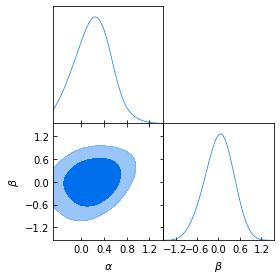

In [9]:
# Export the results to GetDist
from getdist.mcsamples import loadCobayaSamples
#print updated_info
#print products["sample"]
gd_sample = loadCobayaSamples(updated_info, products["sample"])
# Analyze and plot
import getdist.plots as gdplt
print("Mean:")
print(gd_sample.getMeans()[:2])
print("Covariace matrix:")
print(gd_sample.getCovMat().matrix[:2,:2])
# %matplotlib inline  # uncomment if running from the Jupyter notebook
import getdist.plots as gdplot
gdplot = gdplt.getSubplotPlotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

In [74]:
# Let's repeat the results using seaborn:

#First, let read the chains and transform them into panda data frame
def read_chains(name_file):
    data_mcmc = np.genfromtxt(name_file, names=True)
    s = pd.DataFrame(data=data_mcmc, columns=data_mcmc.dtype.names)
    return s

chains_df = read_chains("chains/gaussian_1.txt")

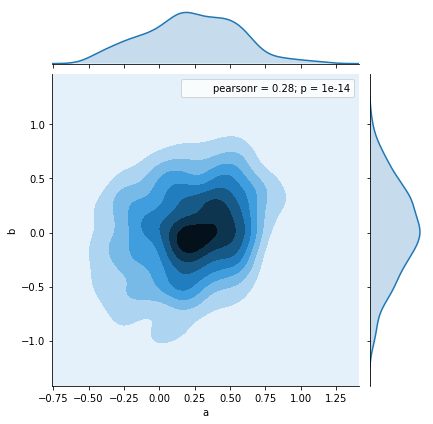

In [76]:
g = sns.jointplot(chains_df["a"], chains_df["b"], kind="kde")